In [1]:
from derivatives import *
import datetime as dt
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

# Tests for european call

In [3]:
gbm_env = MarketEnvironment('GBE_ENV', dt.datetime(2020, 1, 1))

In [4]:
gbm_env.add_constant('initial_value', 36.)
gbm_env.add_constant('volatility', 0.2)
gbm_env.add_constant('final_date', dt.datetime(2020, 12, 31))
gbm_env.add_constant('currency', 'EUR')
gbm_env.add_constant('frequency', 'M')
gbm_env.add_constant('paths', 100000)

In [5]:
csr_model = ConstantShortRate('csr', 0.06)

In [6]:
gbm_env.add_curve('discount_curve', csr_model)

In [7]:
gbm_model = GeometricBrownianMotion('gbm', gbm_env)

In [8]:
gbm_model.generate_time_grid()

In [9]:
call_env = MarketEnvironment('call', gbm_model.pricing_date)

In [10]:
gbm_model.pricing_date

datetime.datetime(2020, 1, 1, 0, 0)

In [11]:
call_env.add_constant('strike', 40.)

In [12]:
call_env.add_constant('maturity', dt.datetime(2020, 12, 31))

In [13]:
call_env.add_constant('currency', 'EUR')

In [14]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [15]:
call = ValuationEuropeanMonteCarlo('call_env', underlying=gbm_model,
mar_env=call_env, payoff_func=payoff_func)

In [16]:
%time call.present_value()

CPU times: user 46.8 ms, sys: 7.6 ms, total: 54.4 ms
Wall time: 53.9 ms


2.177943

In [17]:
%time call.delta()

CPU times: user 49.4 ms, sys: 522 µs, total: 49.9 ms
Wall time: 49 ms


0.4343

In [18]:
%time call.vega()

CPU times: user 88 ms, sys: 4.05 ms, total: 92 ms
Wall time: 90.9 ms


14.1331

In [19]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    call.update(initial_value=s)
    p_list.append(call.present_value(fixed_seed=True))
    d_list.append(call.delta())
    v_list.append(call.vega())

CPU times: user 1.16 s, sys: 83.5 ms, total: 1.25 s
Wall time: 1.25 s


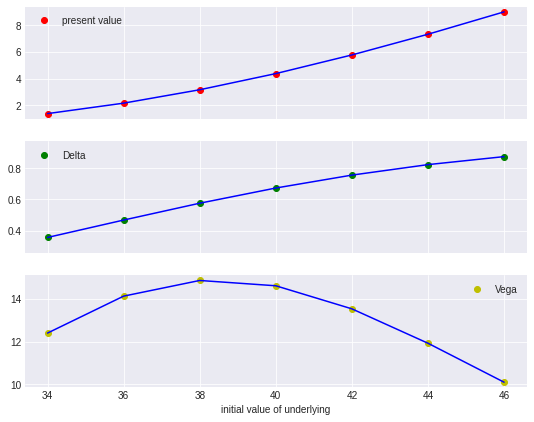

In [20]:
plot_option_stats(s_list, p_list, d_list, v_list)

CPU times: user 1.24 s, sys: 59.8 ms, total: 1.3 s
Wall time: 1.31 s


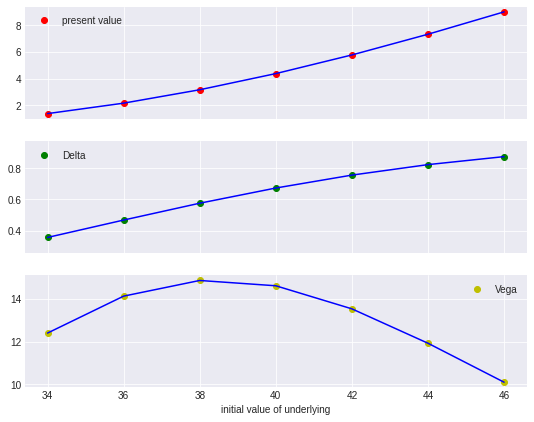

In [21]:
%time call.generate_plot(34., 46.1, 2.)

# Tests for european put

In [32]:
put_env = MarketEnvironment('put', gbm_model.pricing_date)

In [33]:
put_env.add_constant('strike', 40.)
put_env.add_constant('maturity', dt.datetime(2020, 12, 31))
put_env.add_constant('currency', 'EUR')
payoff_func_put = 'np.maximum(strike - maturity_value, 0)'

In [34]:
put = ValuationEuropeanMonteCarlo('put_env', underlying=gbm_model,
mar_env=put_env, payoff_func=payoff_func_put)

In [35]:
%time put.present_value()

CPU times: user 54.2 ms, sys: 214 µs, total: 54.4 ms
Wall time: 53.1 ms


0.692486

In [36]:
%time put.delta()

CPU times: user 60.2 ms, sys: 4 ms, total: 64.2 ms
Wall time: 63.6 ms


-0.1316

In [38]:
%time put.vega()

CPU times: user 96.7 ms, sys: 7.91 ms, total: 105 ms
Wall time: 103 ms


10.1916

CPU times: user 1.39 s, sys: 108 ms, total: 1.49 s
Wall time: 1.49 s


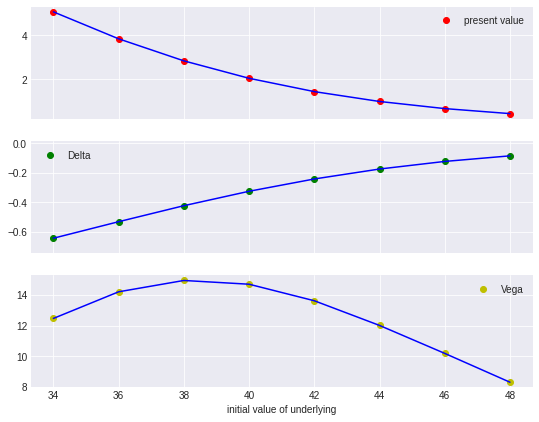

In [40]:
%time put.generate_plot(34., 50, 2.)

# comaprison quant lib

In [1]:
import QuantLib as ql 

In [5]:
maturity_date = ql.Date(31, 12, 2020)
spot_price = 36
strike_price = 130
volatility = 0.2 # the historical vols or implied vols
dividend_rate =  0.0
option_type = ql.Option.Call
risk_free_rate = 0.06
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()
calculation_date = ql.Date(1, 1 ,2020)
ql.Settings.instance().evaluationDate = calculation_date
eu_exercise = ql.EuropeanExercise(maturity_date)
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
european_option = ql.VanillaOption(payoff, eu_exercise)

In [6]:
european_option

<QuantLib.QuantLib.VanillaOption; proxy of <Swig Object of type 'ext::shared_ptr< VanillaOption > *' at 0x7f1fac68a7e0> >